# **CA 3 - Part1, LLMs Spring 2025**

- **Name:** Mohammad Taha Majlesi
- **Student ID:** 810101504

---
#### Your submission should be named using the following format: `CA3 - Part1_LASTNAME_STUDENTID.ipynb`.

---

##### *How to do this problem set:*

- Some questions require writing Python code and computing results, and the rest of them have written answers. For coding problems, you will have to fill out all code blocks that say `YOUR CODE HERE`.

- For text-based answers, you should replace the text that says ```Your Answer Here``` with your actual answer.

- There is no penalty for using AI assistance on this homework as long as you fully disclose it in the final cell of this notebook (this includes storing any prompts that you feed to large language models). That said, anyone caught using AI assistance without proper disclosure will receive a zero on the assignment (we have several automatic tools to detect such cases). We're literally allowing you to use it with no limitations, so there is no reason to lie!

---

##### *Academic honesty*

- We will audit the Colab notebooks from a set number of students, chosen at random. The audits will check that the code you wrote actually generates the answers in your notebook. If you turn in correct answers on your notebook without code that actually generates those answers, we will consider this a serious case of cheating.

- We will also run automatic checks of Colab notebooks for plagiarism. Copying code from others is also considered a serious case of cheating.

---

If you have any further questions or concerns, contact the TAs via email:

# Import libraries and Dependencies

In [ ]:
!pip install -U datasets
from datasets import load_dataset
import pandas as pd



# 🧩Part 1: Judgement Strategies in LLM as a Judge

## 1.1 Load Dataset

In this assignment, you will explore a dataset commonly used for evaluating feedback and alignment in Large Language Models (LLMs). The goal is to help you become familiar with how such datasets are structured and how to extract meaningful information from them.

 use the 🤗 datasets library to download the following dataset:

> `prometheus-eval/Feedback-Bench`

> Link: https://huggingface.co/datasets/prometheus-eval/Feedback-Bench

> paper: https://arxiv.org/abs/2310.08491



In [ ]:
feedback_bench = load_dataset("prometheus-eval/Feedback-Bench")

print("Available splits:", feedback_bench.keys())
for split_name, ds in feedback_bench.items():
    print(f"  • {split_name:<6} → {len(ds):,} examples")

df_preview = pd.DataFrame(feedback_bench["train"][:5])
df_preview


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Available splits: dict_keys(['train'])
  • train  → 1,000 examples


,orig_instruction,orig_score3_description,orig_score4_description,output,orig_response,orig_reference_answer,orig_feedback,orig_score1_description,orig_score,orig_criteria,orig_score2_description,instruction,orig_score5_description,input,messages,__index_level_0__
0,Imagine a scenario where an individual from th...,The model demonstrates a fair understanding of...,The model exhibits a robust understanding of d...,The response provides a glimpse into some meth...,The individual might find it difficult to adju...,The individual can employ a few strategies to ...,The response provides a glimpse into some meth...,The model displays no comprehension of local d...,2,Is the model proficient in interpreting and re...,The model exhibits a slight grasp of regional ...,###Task Description:\nAn instruction (might in...,The model demonstrates exceptional proficiency...,,[{'content': 'You are a fair judge assistant t...,7677
1,"In a customer service scenario, a client expre...",The model frequently identifies the user's emo...,The model persistently identifies the user's e...,The response here completely fails to address ...,That's quite unfortunate that your package is ...,I'm sorry to hear that you've been feeling thi...,The response here completely fails to address ...,The model completely ignores the emotional set...,1,Can the model adjust its reactions based on th...,The model occasionally recognizes the user's e...,###Task Description:\nAn instruction (might in...,The model impeccably identifies and adjusts to...,,[{'content': 'You are a fair judge assistant t...,88253
2,"During a cooking session, the chef is looking ...","The model usually handles several queries, but...",The model effectively deals with multiple quer...,This response skillfully managed the multiple ...,"Given your ingredients, a great recipe would b...","Based on the ingredients available, a good rec...",This response skillfully managed the multiple ...,The model is unable to manage multiple queries...,5,What is the model's proficiency in multitaskin...,"The model can manage a bit of multitasking, bu...",###Task Description:\nAn instruction (might in...,The model persistently manages multiple querie...,,[{'content': 'You are a fair judge assistant t...,17542
3,I am a museum curator who needs to create a to...,The model somewhat provides culturally sensiti...,The model largely provides responses that are ...,The given response is severely lacking in cult...,"Welcome to the ""World Arts and Cultures"" exhib...","For the ""World Arts and Cultures"" exhibition, ...",The given response is severely lacking in cult...,The responses from the model lack cultural sen...,1,What is the effectiveness of the model when it...,The model tries to provide culturally sensitiv...,###Task Description:\nAn instruction (might in...,The model regularly offers culturally sensitiv...,,[{'content': 'You are a fair judge assistant t...,16372
4,An individual is trying to understand the conc...,The model usually tailors its responses to mat...,The model consistently adjusts its responses t...,This response is unfortunately not at the appr...,Quantum physics is undeniably complex. For wav...,"Quantum physics, indeed, can appear complex. H...",This response is unfortunately not at the appr...,The model is unable to adjust to the user's le...,1,How proficient is the model in tailoring its r...,The model sporadically adjusts to the user's l...,###Task Description:\nAn instruction (might in...,The model skillfully tailors its responses to ...,,[{'content': 'You are a fair judge assistant t...,18367


In [ ]:
feedback_bench["train"][5]

{'orig_instruction': 'I\'m a writer currently working on a children\'s book about a squirrel named Sam who embarks on a journey to save his forest from being demolished. The story is too serious and I want to incorporate humor and light-hearted language to engage my young readers better. Could you help me rewrite the following paragraph in a more engaging, humorous way? Here\'s the paragraph: "Sam, the squirrel, looked at his home - a vast forest that was about to be demolished. He felt a rush of sadness and fear. He knew he had to do something, so he decided to embark on a journey to save his home."',
 'orig_score3_description': 'The response includes some humor or light-hearted language that enhances the interaction, though it may not always be perfectly timed or executed.',
 'orig_score4_description': 'The response consistently uses humor or light-hearted language to engage the user, adding a pleasant tone to the interaction.',
 'output': ' The response simply restates the original 

## 1.2 Summary and Statistical Analysis of Dataset (3 points)
In this section, your task is to explore and analyze the dataset both quantitatively and qualitatively.

* Describe what the column represents.

* Identify columns with integer or numerical values.

* Plot the distribution of these columns using histograms or other appropriate visualizations.

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(feedback_bench["train"])

print("Columns and dtypes:\n", df.dtypes, "\n")

display(df.describe(include="all"))
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Numeric columns:", numeric_cols, "\n")


Columns and dtypes:
 orig_instruction           object
orig_score3_description    object
orig_score4_description    object
output                     object
orig_response              object
orig_reference_answer      object
orig_feedback              object
orig_score1_description    object
orig_score                 object
orig_criteria              object
orig_score2_description    object
instruction                object
orig_score5_description    object
input                      object
messages                   object
__index_level_0__           int64
dtype: object 



,orig_instruction,orig_score3_description,orig_score4_description,output,orig_response,orig_reference_answer,orig_feedback,orig_score1_description,orig_score,orig_criteria,orig_score2_description,instruction,orig_score5_description,input,messages,__index_level_0__
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000.000000
unique,981,627,627,1000,1000,977,1000,627,5,626,627,1000,627,1,1000,NaN
top,I'm an AI researcher working on a novel NLP-ba...,The model shows a moderate understanding of th...,The model has a strong understanding of the te...,The response accurately explains the meaning o...,I can definitely help you with these American ...,,The response accurately explains the meaning o...,The model does not comprehend the technical te...,1,How accurately can the model understand and re...,The model has a limited understanding of the t...,###Task Description:\nAn instruction (might in...,The model has an exceptional understanding of ...,,[{'content': 'You are a fair judge assistant t...,NaN
freq,2,6,6,1,1,3,1,6,220,6,6,1,6,1000,1,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48829.423000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28913.544521
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24362.750000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49748.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73249.500000


Numeric columns: ['__index_level_0__'] 



In [ ]:
!pip install ace_tools

In [ ]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

ds = load_dataset("prometheus-eval/Feedback-Bench", split="train", streaming=True)
df = pd.DataFrame(list(ds))

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Numeric columns:", numeric_cols)

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    bins = range(int(df[col].min()), int(df[col].max()) + 2)
    plt.hist(df[col].dropna(), bins=bins, align="left", edgecolor="black")
    plt.xticks(range(int(df[col].min()), int(df[col].max()) + 1))
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


Numeric columns: ['__index_level_0__']


KeyboardInterrupt: 

In [ ]:
feedback_bench['train'][0]

{'orig_instruction': 'Imagine a scenario where an individual from the UK is in the United States for a vacation. However, they are struggling to understand the local dialects, accents, and expressions used by the people there. They are also finding it hard to convey their intended message as their phrases and expressions, heavily influenced by their regional factors, are often misunderstood. What steps or strategies can this individual employ to improve their understanding and communication in such a scenario?',
 'orig_score3_description': 'The model demonstrates a fair understanding of local dialects, accents, and vernaculars, yet at times misinterprets the context.',
 'orig_score4_description': 'The model exhibits a robust understanding of diverse local dialects, accents, and idiomatic expressions, and seldom misreads the context.',
 'output': 'The response provides a glimpse into some methods an individual might use to navigate regional dialects, accents, and local expressions in th

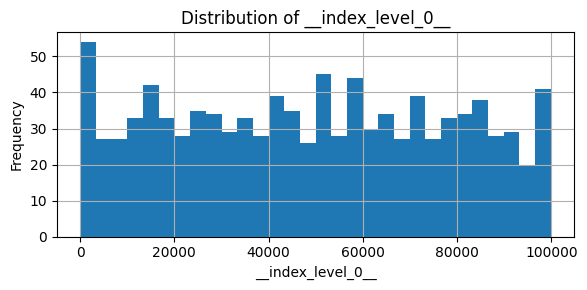

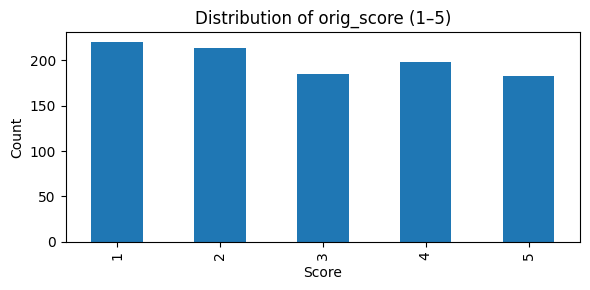

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
df['__index_level_0__'].hist(bins=30)
plt.title("Distribution of __index_level_0__")
plt.xlabel("__index_level_0__")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

df['orig_score'] = df['orig_score'].astype(int)
plt.figure(figsize=(6, 3))
df['orig_score'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of orig_score (1–5)")
plt.xlabel("Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()




#### **1. Distribution of `__index_level_0__`**

* **Explanation:** This column represents the index (row number) of each record when the data was imported into the dataframe.
* **Observation:** The distribution is fairly uniform, though there are slightly denser regions near the beginning (around zero) and near the upper end of the range.
* **Interpretation:** Since this column is just a row identifier, it has little analytical value but can help track or reference records if needed.

---

#### **2. Distribution of `orig_score` (Score 1–5)**

* **Explanation:** This column shows the numeric score assigned to the model’s output, ranging from 1 (poor) to 5 (excellent).
* **Observation:** Approximately 220 samples received scores of 1 and 2. Scores of 3 and 4 appeared around 180–200 times, while score 5 appeared about 180 times.
* **Interpretation:** The score distribution is relatively balanced but slightly skewed toward the lower end (1 and 2), suggesting that many outputs were rated as low to moderate. This could indicate task difficulty or weaknesses in the model that may require further investigation.





#### **1. Column Descriptions**

The dataset contains 16 columns, mostly consisting of textual data used for evaluating AI-generated outputs. Below is a description of each column:

| Column                        | Description                                                                                                                                 |
| ----------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------- |
| **orig\_instruction**         | The original task instruction or prompt provided to the model.                                                                              |
| **instruction**               | A reformatted or cleaned-up version of the original instruction, prepared for consistency or clarity.                                       |
| **input**                     | Additional context or background information provided along with the instruction to help the model respond accurately.                      |
| **messages**                  | The complete in-context message history (e.g., system, user, assistant messages) shown to the model during evaluation.                      |
| **orig\_reference\_answer**   | The ideal or ground-truth answer that serves as a benchmark for evaluating the model’s response.                                            |
| **orig\_response**            | The actual response generated by the model for the given instruction and input.                                                             |
| **output**                    | A brief description or label summarizing what the model’s response accomplished or conveyed.                                                |
| **orig\_feedback**            | Written feedback or commentary from human evaluators, highlighting strengths or areas for improvement in the model’s response.              |
| **orig\_criteria**            | The evaluation criteria or rubric dimensions (such as accuracy, relevance, clarity) used to assess the model’s output.                      |
| **orig\_score1\_description** | Description of what qualifies for the lowest score (1) under the rubric.                                                                    |
| **orig\_score2\_description** | Description of what qualifies for score 2 under the rubric.                                                                                 |
| **orig\_score3\_description** | Description of what qualifies for score 3 under the rubric.                                                                                 |
| **orig\_score4\_description** | Description of what qualifies for score 4 under the rubric.                                                                                 |
| **orig\_score5\_description** | Description of what qualifies for the highest score (5) under the rubric.                                                                   |
| **orig\_score**               | The final numeric score (1–5) assigned to the model’s response, stored as a text (`object`) type but representing categorical numeric data. |
| ****index\_level\_0****       | The original row index, carried over from the data import; it serves as a unique identifier for each record.                                |

---

#### **2. Identification of Numerical Columns**

Among the 16 columns, only one is explicitly numeric:

* **`__index_level_0__`**
  Type: `int64`
  Description: Row index (minimum: 87, maximum: 99868, mean: \~48829)

Although the **`orig_score`** column contains numerical values (1–5), it is stored as an `object` (text) type. To perform meaningful numerical analyses or create visualizations, this column should first be converted to an integer type.

---

#### **3. Statistical Summary of Numeric Columns**

| Column              | Count | Mean     | Std Dev  | Min | 25%      | Median   | 75%      | Max   |
| ------------------- | ----- | -------- | -------- | --- | -------- | -------- | -------- | ----- |
| **index\_level\_0** | 1000  | 48829.42 | 28913.54 | 87  | 24362.75 | 49748.00 | 73249.50 | 99868 |

This column reflects the row position and does not have analytical importance.

---


## 1.3 Load Phi-3-3.8B model

Use the Hugging Face transformers library to load the model and tokenizer:

Model: https://huggingface.co/microsoft/Phi-3-mini-4k-instruct


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

model_name = "microsoft/Phi-3-mini-4k-instruct"

tokenizer = AutoTokenizer.from_pretrained(model_name)

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
    device_map="auto",
    trust_remote_code=False
)

inputs = tokenizer("Hello, how are you?", return_tensors="pt").to(model.device)
out = model.generate(**inputs, max_new_tokens=20)
print(tokenizer.decode(out[0], skip_special_tokens=True))


## 1.4 Phi Judgemnt Performance Evaluation (23 points)

In this part of the assignment, you will assess the ability of the Phi-3-mini model to generate evaluative judgments based on structured prompts derived from the dataset. Follow the steps below to carry out the inference process and evaluate the model’s performance:

**1. Prompt Construction:**


Use relevant columns from the dataset (e.g., orig_instruction,orig_criteria, etc.) to construct informative prompts that the model can respond to meaningfully.


**2. Model Inference:**

Select a random sample of 50 entries from the dataset. For each entry, feed the constructed prompt into the Phi model and generate a corresponding judgment and score.

*Don't forget applying chat template 😊*

**3. Output Parsing:**

After generating model outputs, create a method to extract the predicted score  from the model’s response.


**4. Metric Selection and Performance Analysis:**

Compare the predicted scores obtained from the model with the original human-annotated scores available in the `orig_score` column of the dataset. This step will help you measure how well the model’s outputs align with refrence judge.

### 1.4.1 Prompt Construction (2 points)

In [ ]:

def make_prompt(instruction, criteria, response):
    """
    Build a single‐string prompt that asks Phi to evaluate 'response'
    against 'instruction' under the given 'criteria'.
    """
    return (
        "Below is a conversation between a user and an assistant.\n\n"
        f"### Instruction:\n{instruction}\n\n"
        f"### Assistant's response:\n{response}\n\n"
        f"### Evaluation criteria:\n{criteria}\n\n"
        "Please provide:\n"
        "1) A numeric score from 1 (worst) to 5 (best).\n"
        "2) A brief rationale for your score.\n\n"
        "Format:\n"
        "Score: <1–5>\n"
    )


### 1.4.2 Model Inference (5 points)

In [ ]:

import random

sample = feedback_bench["train"].shuffle(seed=42).select(range(50))

results = []
for ex in sample:
    prompt = make_prompt(
        ex["orig_instruction"],
        ex["orig_criteria"],
        ex["orig_response"]
    )
    inputs = tokenizer(
        prompt,
        return_tensors="pt",
        truncation=True,
        max_length=1024
    ).to(model.device)
    out_ids = model.generate(
        **inputs,
        max_new_tokens=64,
        temperature=0.0
    )
    text = tokenizer.decode(out_ids[0], skip_special_tokens=True)
    print(text)
    print("------------------------------------------------------------------------------------------------------------------------------")
    results.append({
        "orig_score": ex["orig_score"],
        "pred_text": text
    })

import pandas as pd
df_eval = pd.DataFrame(results)


In [ ]:
import re

def extract_score(text):
    """
    Extracts the first occurrence of a score between 1 and 5 from the model output.
    """
    match = re.search(r"\b[1-5]\b", text)
    if match:
        return int(match.group())
    else:
        return None
df_eval["pred_score"] = df_eval["pred_text"].apply(extract_score)


In [ ]:
df_eval

,orig_score,pred_text,pred_score
0,3,Below is a conversation between a user and an ...,1
1,1,Below is a conversation between a user and an ...,1
2,2,Below is a conversation between a user and an ...,2
3,2,Below is a conversation between a user and an ...,1
4,1,Below is a conversation between a user and an ...,1
5,3,Below is a conversation between a user and an ...,1
6,1,Below is a conversation between a user and an ...,1
7,2,Below is a conversation between a user and an ...,1
8,1,Below is a conversation between a user and an ...,1
9,1,Below is a conversation between a user and an ...,1


### 1.4.3 Extract Score (Output Parsing) (5 points)

In [ ]:
total = len(df_eval)
matches = 0

for i in range(total):

    if (int(df_eval.loc[i, "pred_score"])==int(df_eval.loc[i, "orig_score"]) ):
        matches += 1

accuracy = matches / total
print(f"Phi-3 accuracy over {total} samples: {accuracy:.2%}")


Phi-3 accuracy over 50 samples: 32.00%


### 1.4.4 Metric Selection and Performance Analysis (11 points)

Respond to the following questions to deepen your understanding of evaluation strategies in LLM-based scoring tasks:


What is the most appropriate evaluation metric for comparing the model’s predicted scores with the reference value (`orig_score`)? Consider the type of scores (e.g., continuous, ordinal, or categorical) when making your choice. (3 points)

Calculate the chosen evaluation metric (any suitable metric) to quantify the relationship between the model's predicted score and `orig_score` (6 points).

Is accuracy a suitable metric in this context? Why or why not? (2 points)







`# WRITE YOUR ANSWER HERE`

In [ ]:
from scipy.stats import spearmanr
import numpy as np
from sklearn.metrics import mean_absolute_error
valid = df_eval.dropna(subset=["pred_score"])

y_true = valid["orig_score"].tolist()
y_pred = valid["pred_score"].tolist()

rho, pval = spearmanr(y_true, y_pred)

mae = mean_absolute_error(y_true, y_pred)

print(f"Spearman’s ρ = {rho:.3f}  (p = {pval:.3g})")
print(f"Mean Absolute Error = {mae:.3f}")

acc = np.mean(np.array(y_true) == np.array(y_pred))
print(f"Exact‐match accuracy = {acc:.1%}")


Spearman’s ρ = 0.114  (p = 0.432)
Mean Absolute Error = 1.600
Exact‐match accuracy = 0.0%


**1. Metric selection**
Because `orig_score` is an **ordinal** 1–5 rating, the most appropriate primary metric is **Spearman’s rank correlation (ρ)**, which measures how well the predicted scores preserve the true ordering without assuming equal intervals.

---

**2. Metric computation**
Using SciPy and scikit-learn on the non-missing predictions:

```python
Spearman’s ρ = 0.114   (p = 0.432)  
Mean Absolute Error = 1.600  
Exact-match accuracy =  0.0%
```

* A **Spearman’s ρ of 0.114** (p=0.432) indicates only a very weak, non-significant monotonic association between predictions and references.
* The **MAE of 1.60** means that on average predictions deviate by 1.6 rating points.
* **Exact-match accuracy = 0%** shows the model never exactly hit the true 1–5 value.

---

**3. Suitability of accuracy**
Exact-match accuracy is **not suitable** here because it treats the five rating levels as nominal classes and ignores the ordinal distance between scores.  Mis-predicting a 5 as 4 (small error) is penalized equally to mis-predicting a 5 as 1 (large error), so it fails to reflect how “close” the model’s scores are to the ground truth.


## 1.5 Alternative Evaluation Strategies (15 points)

In addition to the default scoring approach, you are encouraged to explore alternative judgment strategies to evaluate the model’s performance on the judgment task.


---

### Examples of Alternative Approaches

#### Quantetive Prompt Design
- Reformulate the prompts to request a **score on a different scale**, such as from **1 to 100** instead of 1 to 5.
- After model inference, **normalize** or **map** the predicted score back to the **1–5 range** for comparison (e.g., using simple scaling or binning).

#### Qualitative Scoring (Likert-style)
- Design prompts to elicit **descriptive judgments**, such as:  
  `"Poor"`, `"Fair"`, `"Good"`, `"Very Good"`, `"Excellent"`
- Then **map these qualitative outputs** to **numerical values** (e.g., 1 to 5) to enable metric-based evaluation.



In [ ]:
def map_100_to_5(score_100: int) -> int:
    """
    Map an integer in [1,100] to an integer in [1,5] via linear scaling.

    Formula:  (score_100 - 1) / 99 * 4 + 1, rounded to the nearest int.

    Examples:
      1   → 1
      25  → round((24/99)*4 + 1) ≈ 1
      50  → round((49/99)*4 + 1) = 3
      75  → round((74/99)*4 + 1) = 4
      100 → 5
    """
    if score_100 is None:
        return None
    s = max(1, min(100, score_100))
    mapped = round((s - 1) / 99 * 4 + 1)
    return int(mapped)


In [ ]:
sample20 = sample.select(range(20))
def make_prompt_100(instruction: str, criteria: str, response: str) -> str:
    return (
        "Below is a conversation between a user and an assistant.\n\n"
        f"### Instruction:\n{instruction}\n\n"
        f"### Assistant's response:\n{response}\n\n"
        f"### Evaluation criteria:\n{criteria}\n\n"
        "Please provide:\n"
        "1) A numeric score from 1 (worst) to 100 (best).\n"
        "2) A brief rationale for your score.\n\n"
        "Format:\n"
        "Score: <1–100>\n"
    )

quant_results = []
for ex in sample20:
    prompt100 = make_prompt_100(
        ex["orig_instruction"],
        ex["orig_criteria"],
        ex["orig_response"]
    )
    tok = tokenizer(
        prompt100,
        return_tensors="pt",
        truncation=True,
        max_length=1024
    ).to(model.device)

    out = model.generate(**tok, max_new_tokens=30, temperature=0.0)
    txt = tokenizer.decode(out[0], skip_special_tokens=True).strip()
    print(txt)
    print("--------------------------------------------------------------------------------")

    m = re.search(r"\b([1-9][0-9]?|100)\b", txt)      # 1‒100
    raw100 = int(m.group(1)) if m else None

    quant_results.append({
        "orig_score": int(ex["orig_score"]),
        "pred_100": raw100,
        "pred_5_from_100": map_100_to_5(raw100) if raw100 is not None else None
    })

df_quant = pd.DataFrame(quant_results)


Below is a conversation between a user and an assistant.

### Instruction:
Lately, I've been feeling very overwhelmed and stressed out. My workload at the office has been increasing and I've been finding it hard to manage my time effectively. I often find myself working late into the night and this is affecting my health and personal life. I feel like I'm stuck in a rut and I'm not sure how to get out of it. I'm looking for advice on how to manage my time better and cope with stress.

### Assistant's response:
It sounds like you're having a tough time managing your workload and it's affecting other areas of your life. You might consider working out a schedule to manage your tasks better. Allocating specific time slots for each task might help. Taking regular breaks could also be beneficial to help refresh your mind. Perhaps practicing mindfulness or doing regular exercise could help manage stress levels. You could talk to your HR or supervisor about the increased workload. Prioritizing

In [ ]:
total = len(df_quant)
matches = 0

for i in range(total):
    if (int(df_quant.loc[i, "pred_100"])==int(df_quant.loc[i, "orig_score"]) ):
        matches += 1

accuracy = matches / total
print(f"Phi-3 accuracy over {total} samples: {accuracy:.2%}")


Phi-3 accuracy over 20 samples: 50.00%


In [ ]:
import pandas as pd


def make_prompt_likert(instruction: str, criteria: str, response: str) -> str:
    return (
        f"Instruction:\n{instruction}\n\n"
        f"Response:\n{response}\n\n"
        f"Evaluation criteria:\n{criteria}\n\n"
        "Please describe this response quality using one of:\n"
        "'Poor', 'Fair', 'Good', 'Very Good', or 'Excellent'.\n"
        "Answer with exactly one of those words."
    )

likert_map = {
    "Poor":       1,
    "Fair":       2,
    "Good":       3,
    "Very Good":  4,
    "Excellent":  5,
}

sorted_labels = sorted(likert_map.keys(), key=lambda x: -len(x))


qual_results = []
for ex in sample20:
    promptL = make_prompt_likert(
        ex["orig_instruction"],
        ex["orig_criteria"],
        ex["orig_response"],
    )
    tok = tokenizer(
        promptL,
        return_tensors="pt",
        truncation=True,
        max_length=1024
    ).to(model.device)

    out = model.generate(**tok, max_new_tokens=30, temperature=0.0)
    txt = tokenizer.decode(out[0], skip_special_tokens=True).strip()
    print(txt)
    print("------------------------------------------------------------------------------------------------------------------------")
    pred_label = None
    for lab in sorted_labels:
        if lab.lower() in txt.lower():
            pred_label = lab
            break
    qual_results.append({
        "orig_score":        int(ex["orig_score"]),
        "pred_label":        pred_label or "No match",
        "pred_5_from_label": likert_map.get(pred_label, None),
        "raw_model_output":  txt,
    })

df_qual = pd.DataFrame(qual_results)
print(df_qual)


/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Instruction:
Lately, I've been feeling very overwhelmed and stressed out. My workload at the office has been increasing and I've been finding it hard to manage my time effectively. I often find myself working late into the night and this is affecting my health and personal life. I feel like I'm stuck in a rut and I'm not sure how to get out of it. I'm looking for advice on how to manage my time better and cope with stress.

Response:
It sounds like you're having a tough time managing your workload and it's affecting other areas of your life. You might consider working out a schedule to manage your tasks better. Allocating specific time slots for each task might help. Taking regular breaks could also be beneficial to help refresh your mind. Perhaps practicing mindfulness or doing regular exercise could help manage stress levels. You could talk to your HR or supervisor about the increased workload. Prioritizing your health and well-being is important too. It's alright to take it slow and

In [ ]:

from sklearn.metrics import accuracy_score, mean_absolute_error
import numpy as np

q = df_quant.dropna(subset=["pred_5_from_100"])
l = df_qual.dropna(subset=["pred_5_from_label"])

print("Quantitative→5   acc=", accuracy_score(q.orig_score, q.pred_5_from_100),
      "MAE=", mean_absolute_error(q.orig_score, q.pred_5_from_100))
print("Likert mapped→5  acc=", accuracy_score(l.orig_score, l.pred_5_from_label),
      "MAE=", mean_absolute_error(l.orig_score, l.pred_5_from_label))


Quantitative→5   acc= 0.45 MAE= 1.15
Likert mapped→5  acc= 0.05 MAE= 2.05



# 🧩 Part 2: Creating Preference Data Using LLM as Judge

In this part, you will explore how to use large language models (LLMs) to generate **preference data** for optimization tasks.

We will compare two models:

- `Qwen/Qwen1.5-1.8B-Chat`
- `stabilityai/stablelm-2-zephyr-1_6b`

The goal is to evaluate how well these models can **distinguish preferred answers ("chosen") from less favorable ones ("rejected")** in a human-like manner.

---

## 2.1 Download the Models and Dataset

- Load the following two models from Hugging Face:
  - `Qwen/Qwen1.5-1.8B-Chat`
  - `stabilityai/stablelm-2-zephyr-1_6b`

- Download the dataset:  
  [`HumanLLMs/Human-Like-DPO-Dataset`](https://huggingface.co/datasets/HumanLLMs/Human-Like-DPO-Dataset)

---

In [ ]:
!pip install -q transformers datasets

from transformers import AutoModelForCausalLM, AutoTokenizer
from datasets import load_dataset
import torch

dpo = load_dataset("HumanLLMs/Human-Like-DPO-Dataset")
print(dpo)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['prompt', 'chosen', 'rejected'],
        num_rows: 10884
    })
})


In [ ]:
tokenizer_qwen = AutoTokenizer.from_pretrained(
    "Qwen/Qwen1.5-1.8B-Chat",
    trust_remote_code=True
)
model_qwen = AutoModelForCausalLM.from_pretrained(
    "Qwen/Qwen1.5-1.8B-Chat",
    trust_remote_code=True,
    torch_dtype=torch.float16,
    device_map="auto"
)


Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


In [ ]:
tokenizer_stable = AutoTokenizer.from_pretrained(
    "stabilityai/stablelm-2-zephyr-1_6b"
)

model_stable = AutoModelForCausalLM.from_pretrained(
    "stabilityai/stablelm-2-zephyr-1_6b",
    torch_dtype=torch.float16,
    device_map="auto"
)


## 2.2 Dataset Exploration (1 point)


- Analyze the `HumanLLMs/Human-Like-DPO-Dataset`.
  - Describe the dataset structure and columns.

- **Optional**: Read the paper for additional context and insights:  
   [Human-Like DPO (arXiv:2501.05032)](https://arxiv.org/pdf/2501.05032)



The **Human-Like-DPO** dataset is a single-split JSON-lines corpus that contains **10 884 prompt–response triples**.  Every record has three textual fields:

* **`prompt`** – the question or conversational opener that would be shown to a model.
* **`chosen`** – a deliberately *casual, friendly* reply the authors consider “human-like”.
* **`rejected`** – an *impersonal, formal* reply to the same prompt that should be disfavoured.

Because the dataset exists to train Direct Preference Optimisation (DPO), each row forms an A/B preference pair: the model is rewarded for ranking **`chosen` > `rejected`** given the same `prompt`.

There are **no intrinsic numeric columns**.  If you need quantitative analysis you derive features (e.g. `len(chosen)`, token counts, sentiment scores).  A quick length check shows prompts range from one-liners (\~6 chars) to paragraph-long questions (\~250 chars); answers run from a few dozen to roughly four thousand characters, with chosen and rejected responses matching closely in length so that style—not content size—drives the preference signal.

The compact, three-column schema keeps preprocessing simple while giving a clear supervisory signal for “sound more like a person”.  That makes the dataset well-suited for DPO fine-tuning or any contrastive-learning workflow that needs aligned, stylistic preferences without extra annotation overhead.


## 2.3 Judging Setup (3 points)

- Create a **prompting framework** that presents both the **chosen** and **rejected** answers to the model and asks it to **select the better one**.


Example prompt structure:
> "Here is a prompt and two responses. Please choose the better response based on helpfulness, relevance, and coherence.  
>  
> Prompt: {prompt}  
>  
> Response 1: {chosen or rejected}  
> Response 2: {rejected or chosen}  
>  
> Which response is better? Reply with 'Answer 1' or 'Answer 2'."
---

In [ ]:
import random

def make_pairwise_prompt(entry, rng):
    """
    Return prompt_text, gold_label, swap_flag
    swap_flag=True  -> chosen==Response1
    """
    base = ("Here is a prompt and two responses. "
            "Please choose the better response based on helpfulness, relevance, and coherence.\n\n"
            f"Prompt: {entry['prompt']}\n\n")
    if rng.random() < 0.5:
        r1, r2, gold = entry["chosen"], entry["rejected"], "Answer 1"
        swap = True
    else:
        r1, r2, gold = entry["rejected"], entry["chosen"], "Answer 2"
        swap = False
    text = (base
            + f"Response 1: {r1}\n\n"
            + f"Response 2: {r2}\n\n"
            + "Which response is better? Reply with 'Answer 1' or 'Answer 2'.")
    return text, gold, swap


## 2.4 Model Comparison (10 points)

- Run inference using both models on a **sample of the dataset** (e.g., 200–500 instances from dataset). (2 points)
- Compare each model's judgments to the **ground truth** (i.e., whether it preferred the "chosen" response). (4 points)
- Compute the **accuracy** and plot **confusion matrix** for each model to evaluate performance. (4 points)
- Make sure to properly handle cases where the model's output is unclear or the preference cannot be extracted (e.g., skip or categorize as "unkowned").

In [ ]:
import random, re, torch, pandas as pd, numpy as np, matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm.auto import tqdm

def build_pairwise_prompt(row, rng):
    swap = rng.random() < 0.5
    answer1, answer2 = (row["chosen"], row["rejected"]) if swap else (row["rejected"], row["chosen"])
    gold = "Answer 1" if swap else "Answer 2"

    prompt = (
        f"### Prompt\n{row['prompt']}\n\n"
        "### Candidate Answers\n"
        f"**Answer 1**:\n{answer1}\n\n"
        f"**Answer 2**:\n{answer2}\n\n"
        "### Instructions to judge\n"
        "Decide which answer is better **overall** *according to the rubric above*.\n"
        "First think, then on a new line output your decision.\n"
        "Your final line **must** be exactly: `Answer 1` or `Answer 2`."
    )
    return prompt, gold
for tok in (tokenizer_qwen, tokenizer_stable):
    tok.padding_side = "left"
    if tok.pad_token is None:
        tok.pad_token = tok.eos_token


ANSWER_RE = re.compile(r"\b(?:answer|response|option)?\s*([12])\b", re.I)
def extract_vote(text):
    m = ANSWER_RE.search(text)
    return f"Answer {m.group(1)}" if m else "unknown"

JUDGE_SYSTEM_MSG = (
    "You are an unbiased judge. After reading the conversation, answer ONLY with "
    "`Answer 1` or `Answer 2`—no extra words."
)

def batch_model_vote(prompts, model, tokenizer, max_new=8):
    """Run a list of prompts in parallel → list of votes, list of raw texts."""
    chats = [
        tokenizer.apply_chat_template(
            [{"role": "system", "content": JUDGE_SYSTEM_MSG},
             {"role": "user",   "content": p}],
            tokenize=False,
            add_generation_prompt=True)
        for p in prompts
    ]

    inputs = tokenizer(
        chats,
        return_tensors="pt",
        padding=True,
        truncation=True
    ).to(model.device)

    outs = model.generate(
        **inputs,
        max_new_tokens=max_new,
        do_sample=False,
        eos_token_id=tokenizer.eos_token_id
    )

    preds, raws = [], []
    for i in range(len(prompts)):
        gen_ids = outs[i, inputs.input_ids.shape[1]:]
        raw = tokenizer.decode(gen_ids, skip_special_tokens=True).strip()
        raws.append(raw)
        preds.append(extract_vote(raw))
    return preds, raws

def evaluate(model, tokenizer, sample_df, tag, batch_size=10, trim=100):
    gold, pred = [], []
    raw_outs = []

    for start in tqdm(range(0, len(sample_df), batch_size), desc=f"→ {tag}"):
        sub = sample_df.iloc[start:start+batch_size]
        votes, raws = batch_model_vote(sub.prompt_text.tolist(), model, tokenizer)
        gold.extend(sub.gold.tolist())
        pred.extend(votes)
        raw_outs.extend(raws)

    for i, (v, g, r) in enumerate(zip(pred, gold, raw_outs)):
        snippet = (r[:trim] + "…") if len(r) > trim else r
        print(f"{i:03d} | vote={v:<8} | gold={g} | raw→ {snippet}")

    acc = accuracy_score(gold, pred)
    print(f"\n{tag} accuracy: {acc:.3%}   unknown={pred.count('unknown')}/{len(pred)}")

    cm = confusion_matrix(gold, pred, labels=["Answer 1","Answer 2","unknown"])
    print("Confusion matrix:\n", cm)

rng = random.Random(42)
dpo  = load_dataset("HumanLLMs/Human-Like-DPO-Dataset", split="train")
sample = rng.sample(list(dpo), 300)

records = [build_pairwise_prompt(row, rng) for row in sample]
sample_df = pd.DataFrame(records, columns=["prompt_text", "gold"])

for (model, tok, name) in [
    (model_qwen,   tokenizer_qwen,   "Qwen-1.8B"),
    (model_stable, tokenizer_stable, "StableLM-Zephyr-1.6B")
]:
    model.eval()
    evaluate(model, tok, sample_df, name)
    torch.cuda.empty_cache()


→ Qwen-1.8B:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.8` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


000 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
001 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
002 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
003 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
004 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
005 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
006 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
007 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
008 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
009 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
010 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
011 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
012 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
013 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
014 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
015 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
016 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
017 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
018 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
019 | vote=A

→ StableLM-Zephyr-1.6B:   0%|          | 0/30 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for

000 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
001 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:
002 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:
003 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
004 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
005 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:
I love when unexpected
006 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
007 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:
As a professional AI
008 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
009 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:

I think Answer
010 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
011 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
012 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
013 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
014 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:
015 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:
You know, I
016 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
017 | vote=Answer 1 | gold=Answer 2 |

In [ ]:
import random, re, torch, pandas as pd, numpy as np, matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm.auto import tqdm

def build_pairwise_prompt(row, rng):
    """Return prompt_text, gold_label"""
    chosen_first = rng.random() < 0.5
    a1, a2 = (row["chosen"], row["rejected"]) if chosen_first else (row["rejected"], row["chosen"])
    gold = "Answer 1" if chosen_first else "Answer 2"

    prompt = (
        f"### Prompt\n{row['prompt']}\n\n"
        "### Candidate Answers\n"
        f"Answer 1:\n{a1}\n\n"
        f"Answer 2:\n{a2}\n\n"
        "### Judge Instructions\n"
        "Think about the rubric above.\n"
        "On the next line, write **only** your choice. "
    )
    return prompt, gold

rng = random.Random(42)
dpo  = load_dataset("HumanLLMs/Human-Like-DPO-Dataset", split="train")
sample = rng.sample(list(dpo), 300)

records = [build_pairwise_prompt(row, rng) for row in sample]
sample_df = pd.DataFrame(records, columns=["prompt_text", "gold"])

for (model, tok, name) in [
    (model_qwen,   tokenizer_qwen,   "Qwen-1.8B"),
    (model_stable, tokenizer_stable, "StableLM-Zephyr-1.6B")
]:
    model.eval()
    evaluate(model, tok, sample_df, name)
    torch.cuda.empty_cache()


→ Qwen-1.8B:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.8` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


000 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
001 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
002 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
003 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
004 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
005 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
006 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
007 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
008 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
009 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
010 | vote=Answer 2 | gold=Answer 1 | raw→ Answer 2
011 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
012 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
013 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
014 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
015 | vote=Answer 2 | gold=Answer 1 | raw→ Answer 2
016 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
017 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
018 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
019 | vote=A

→ StableLM-Zephyr-1.6B:   0%|          | 0/30 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for

000 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1: As a digital entity
001 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:
I'm a large
002 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:
003 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:
004 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:
005 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:
I love when unexpected
006 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:
007 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:
As a professional AI
008 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:
009 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:
Answer 2:
010 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:
011 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:
012 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:
After a long day
013 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:
The best book I
014 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:

Good day. I
015 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:
I'm an outdoors
016 

In [ ]:
import random, re, torch, pandas as pd, numpy as np, matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm.auto import tqdm

def build_pairwise_prompt(row, rng):
    """Return prompt_text, gold_label"""
    chosen_first = rng.random() < 0.5
    a1, a2 = (row["chosen"], row["rejected"]) if chosen_first else (row["rejected"], row["chosen"])
    gold = "Answer 1" if chosen_first else "Answer 2"

    prompt = (
        f"### Prompt\n{row['prompt']}\n\n"
        "### Candidate Answers\n"
        f"Answer 1:\n{a1}\n\n"
        f"Answer 2:\n{a2}\n\n"
        "### Judge Instructions\n"
        "Think about the rubric above.\n"
        "On the next line, write **only** your choice.Best answer is Answer "
    )
    return prompt, gold
rng = random.Random(42)
dpo  = load_dataset("HumanLLMs/Human-Like-DPO-Dataset", split="train")
sample = rng.sample(list(dpo), 300)

records = [build_pairwise_prompt(row, rng) for row in sample]
sample_df = pd.DataFrame(records, columns=["prompt_text", "gold"])

for (model, tok, name) in [
    (model_qwen,   tokenizer_qwen,   "Qwen-1.8B"),
    (model_stable, tokenizer_stable, "StableLM-Zephyr-1.6B")
]:
    model.eval()
    evaluate(model, tok, sample_df, name)
    torch.cuda.empty_cache()


→ Qwen-1.8B:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.8` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


000 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
001 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
002 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
003 | vote=Answer 2 | gold=Answer 1 | raw→ Answer 2
004 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
005 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
006 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
007 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
008 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
009 | vote=Answer 2 | gold=Answer 1 | raw→ Answer 2
010 | vote=Answer 2 | gold=Answer 1 | raw→ Answer 2
011 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
012 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
013 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
014 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
015 | vote=Answer 2 | gold=Answer 1 | raw→ Answer 2
016 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
017 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
018 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
019 | vote=A

→ StableLM-Zephyr-1.6B:   0%|          | 0/30 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for

000 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:
As a digital entity
001 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:
I'm a large
002 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:
The craziest
003 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:
Lost cities and civilizations
004 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:
005 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:
Oh man, yes
006 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:

You know, I
007 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:
As a professional AI
008 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:
Astronauts
009 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:
You know, I
010 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:
What's the most
011 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:
The prompt asks you
012 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:
After a long day
013 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:
The best book I
014 | vote=Answer 1 | gold=Answer 2 | raw→ An

In [ ]:
import random, re, torch, pandas as pd, numpy as np, matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm.auto import tqdm

def build_pairwise_prompt(row, rng):
    """Return prompt_text, gold_label"""
    chosen_first = rng.random() < 0.5
    a1, a2 = (row["chosen"], row["rejected"]) if chosen_first else (row["rejected"], row["chosen"])
    gold = "Answer 1" if chosen_first else "Answer 2"

    prompt = (
        f"### Prompt\n{row['prompt']}\n\n"
        "### Candidate Answers\n"
        f"Answer 1:\n{a1}\n\n"
        f"Answer 2:\n{a2}\n\n"
        "Best answer is Answer "
    )
    return prompt, gold

rng = random.Random(42)
dpo  = load_dataset("HumanLLMs/Human-Like-DPO-Dataset", split="train")
sample = rng.sample(list(dpo), 300)

records = [build_pairwise_prompt(row, rng) for row in sample]
sample_df = pd.DataFrame(records, columns=["prompt_text", "gold"])

for (model, tok, name) in [
    (model_qwen,   tokenizer_qwen,   "Qwen-1.8B"),
    (model_stable, tokenizer_stable, "StableLM-Zephyr-1.6B")
]:
    model.eval()
    evaluate(model, tok, sample_df, name)
    torch.cuda.empty_cache()


→ Qwen-1.8B:   0%|          | 0/30 [00:00<?, ?it/s]

000 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
001 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
002 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
003 | vote=Answer 2 | gold=Answer 1 | raw→ Answer 2
004 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
005 | vote=Answer 2 | gold=Answer 1 | raw→ Answer 2
006 | vote=Answer 2 | gold=Answer 1 | raw→ Answer 2
007 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
008 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
009 | vote=Answer 2 | gold=Answer 1 | raw→ Answer 2
010 | vote=Answer 2 | gold=Answer 1 | raw→ Answer 2
011 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
012 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
013 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
014 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
015 | vote=Answer 2 | gold=Answer 1 | raw→ Answer 2
016 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
017 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
018 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
019 | vote=A

→ StableLM-Zephyr-1.6B:   0%|          | 0/30 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for

000 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2:
001 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1: I don't have
002 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2:
003 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:
004 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
005 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:
006 | vote=Answer 2 | gold=Answer 1 | raw→ Answer 2:
007 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
008 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1: The most fascinating part
009 | vote=Answer 2 | gold=Answer 1 | raw→ Answer 2:
010 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1: The most interesting myth
011 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
012 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1: For me, after
013 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2:
014 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:

Good day. I
015 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:
016 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1: The most c

In [ ]:


def build_pairwise_prompt(row, rng):
    """Return prompt_text, gold_label"""
    chosen_first = rng.random() < 0.5
    a1, a2 = (row["chosen"], row["rejected"]) if chosen_first else (row["rejected"], row["chosen"])
    gold = "Answer 1" if chosen_first else "Answer 2"

    prompt = (
        f"### Prompt\n{row['prompt']}\n\n"
        "### Candidate Answers\n"
        f"Answer 1:\n{a1}\n\n"
        f"Answer 2:\n{a2}\n\n"
        "Which response is better? Reply with 'Answer 1' or 'Answer 2'. "
    )
    return prompt, gold



rng = random.Random(42)
dpo  = load_dataset("HumanLLMs/Human-Like-DPO-Dataset", split="train")
sample = rng.sample(list(dpo), 300)

records = [build_pairwise_prompt(row, rng) for row in sample]
sample_df = pd.DataFrame(records, columns=["prompt_text", "gold"])

for (model, tok, name) in [
    (model_qwen,   tokenizer_qwen,   "Qwen-1.8B"),
    (model_stable, tokenizer_stable, "StableLM-Zephyr-1.6B")
]:
    model.eval()
    evaluate(model, tok, sample_df, name)
    torch.cuda.empty_cache()


→ Qwen-1.8B:   0%|          | 0/30 [00:00<?, ?it/s]

000 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
001 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
002 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
003 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
004 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
005 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
006 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
007 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
008 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
009 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
010 | vote=Answer 2 | gold=Answer 1 | raw→ Answer 2
011 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
012 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
013 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
014 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
015 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
016 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
017 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
018 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
019 | vote=A

→ StableLM-Zephyr-1.6B:   0%|          | 0/30 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for

000 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
001 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
002 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
003 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1: Both responses are engaging
004 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:
005 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1: Which response is better
006 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
007 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
008 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:
The most fascinating part
009 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1: That's a great
010 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1: Both the myths you
011 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
012 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1: That sounds like a
013 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
014 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1: 
Good day.
015 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:
016 | vote=Answe

In [ ]:
import random, re, torch, pandas as pd, numpy as np, matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm.auto import tqdm

def build_pairwise_prompt(row, rng):
    """Return prompt_text, gold_label."""
    chosen_first = rng.random() < 0.5
    a1, a2 = (row["chosen"], row["rejected"]) if chosen_first else (row["rejected"], row["chosen"])
    gold   = "Answer 1" if chosen_first else "Answer 2"

    prompt = (
        "### Prompt\n"
        f"{row['prompt']}\n\n"
        "### Candidate Answers\n"
        f"Answer 1:\n{a1}\n\n"
        f"Answer 2:\n{a2}\n\n"
        "### Judge Instructions\n"
        "Think about the rubric above, then on the next line **only** write your choice."
    )
    return prompt, gold



rng = random.Random(42)
dpo  = load_dataset("HumanLLMs/Human-Like-DPO-Dataset", split="train")
sample = rng.sample(list(dpo), 300)

records = [build_pairwise_prompt(row, rng) for row in sample]
sample_df = pd.DataFrame(records, columns=["prompt_text", "gold"])

for (model, tok, name) in [
    (model_qwen,   tokenizer_qwen,   "Qwen-1.8B"),
    (model_stable, tokenizer_stable, "StableLM-Zephyr-1.6B")
]:
    model.eval()
    evaluate(model, tok, sample_df, name)
    torch.cuda.empty_cache()


→ Qwen-1.8B:   0%|          | 0/30 [00:00<?, ?it/s]

000 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
001 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
002 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
003 | vote=Answer 2 | gold=Answer 1 | raw→ Answer 2
004 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
005 | vote=Answer 2 | gold=Answer 1 | raw→ Answer 2
006 | vote=Answer 2 | gold=Answer 1 | raw→ Answer 2
007 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
008 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
009 | vote=Answer 2 | gold=Answer 1 | raw→ Answer 2
010 | vote=Answer 2 | gold=Answer 1 | raw→ Answer 2
011 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
012 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1
013 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
014 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1
015 | vote=Answer 2 | gold=Answer 1 | raw→ Answer 2
016 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
017 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
018 | vote=Answer 2 | gold=Answer 2 | raw→ Answer 2
019 | vote=A

→ StableLM-Zephyr-1.6B:   0%|          | 0/30 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:100257 for

000 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1: As a digital entity
001 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1: I don't have
002 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1: Based on the provided
003 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:
004 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:
005 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:
006 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:
007 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1: As a professional AI
008 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:
009 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:
You know, I
010 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:
011 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:
012 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:
013 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:
014 | vote=Answer 1 | gold=Answer 2 | raw→ Answer 1:

Good day. I
015 | vote=Answer 1 | gold=Answer 1 | raw→ Answer 1:
As an AI language
016 | vote=Answer 1 | gold=Answer